Found 150 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.4650 - loss: 2.9513 - val_accuracy: 0.1733 - val_loss: 0.7486
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6734 - loss: 0.6053 - val_accuracy: 0.8333 - val_loss: 0.5424
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8339 - loss: 0.4853 - val_accuracy: 0.8333 - val_loss: 0.4903
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.7873 - loss: 0.5169 - val_accuracy: 0.8333 - val_loss: 0.4870
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8685 - loss: 0.4545 - val_accuracy: 0.8333 - val_loss: 0.4598
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8234 - loss: 0.5006 - val_accuracy: 0.8333 - val_loss: 0.4618
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.8503 - loss: 0.4786 - val_accuracy: 0.8333 - val_loss: 0.4492
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8474 - loss: 0.4339 - val_accuracy: 0.8333 - val_loss: 0.4409
Epoch 9/

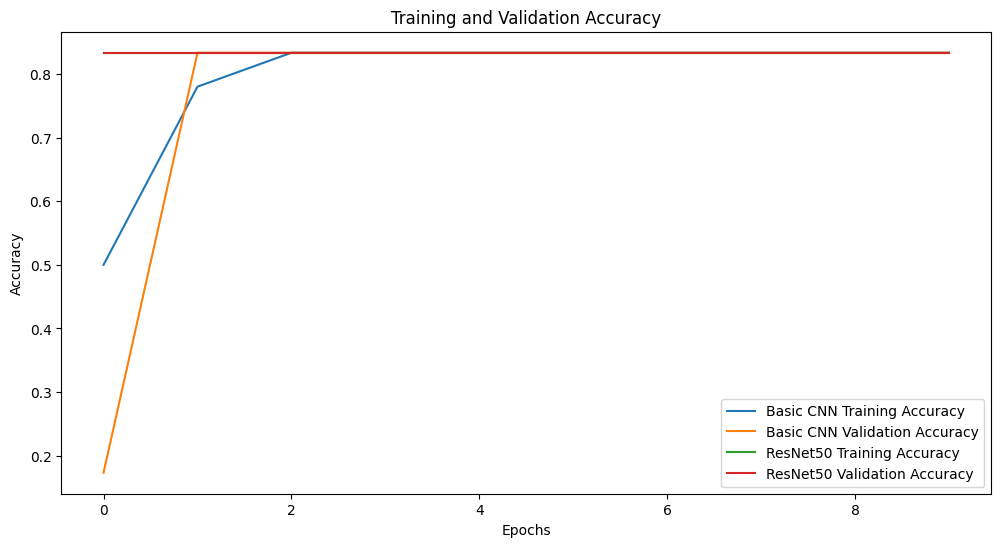

Final Validation Accuracy of Basic CNN: 0.8333
Final Validation Accuracy of ResNet50: 0.8333
Basic CNN outperformed ResNet50.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Paths to your dataset (Update these paths as per your setup)
train_dir = r"C:\Users\acer\Downloads\age detection"  # Update with training set path
validation_dir = r"C:\Users\acer\Downloads\age detection"  # Update with validation set path

# Image size and batch size
image_size = (224, 224)  # ResNet50 requires 224x224 input size
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# 1. Basic CNN Architecture
def create_basic_cnn_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2. ResNet50 Architecture
def create_resnet50_model(input_shape=(224, 224, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model layers for fine-tuning
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dense(train_generator.num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Basic CNN Model
basic_cnn_model = create_basic_cnn_model()
history_basic_cnn = basic_cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Train ResNet50 Model
resnet50_model = create_resnet50_model()
history_resnet50 = resnet50_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plot Training and Validation Accuracy
def plot_accuracy(history_basic_cnn, history_resnet50):
    plt.figure(figsize=(12, 6))
    
    # Basic CNN Model
    plt.plot(history_basic_cnn.history['accuracy'], label='Basic CNN Training Accuracy')
    plt.plot(history_basic_cnn.history['val_accuracy'], label='Basic CNN Validation Accuracy')
    
    # ResNet50 Model
    plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
    plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the function to plot
plot_accuracy(history_basic_cnn, history_resnet50)

# Compare Final Performance
basic_cnn_final_acc = history_basic_cnn.history['val_accuracy'][-1]
resnet50_final_acc = history_resnet50.history['val_accuracy'][-1]

print(f'Final Validation Accuracy of Basic CNN: {basic_cnn_final_acc:.4f}')
print(f'Final Validation Accuracy of ResNet50: {resnet50_final_acc:.4f}')

if resnet50_final_acc > basic_cnn_final_acc:
    print("ResNet50 outperformed Basic CNN.")
else:
    print("Basic CNN outperformed ResNet50.")
